In [2]:
from qiskit import QuantumRegister, ClassicalRegister, Aer, execute, QuantumCircuit
from qiskit.tools.visualization import plot_histogram

In [3]:
import math, random

In [4]:
S_simulator = Aer.get_backend(name='statevector_simulator')
Q_simulator = Aer.get_backend(name='qasm_simulator')

# We will observe the effect of measurement on wave function of qbits

# Circuit design

In [5]:
q = QuantumRegister(1)
c = ClassicalRegister(2)

# Circuit with no intermediate measurement

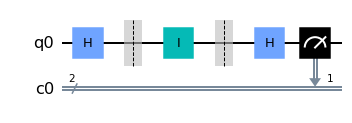

In [17]:
ckt = QuantumCircuit(q,c)

ckt.h(q[0])
ckt.barrier()

ckt.id(q[0])

ckt.barrier()
ckt.h(q[0])
    
ckt.measure(q[0], c[1])
    
ckt.draw(output = "mpl")


# Circuit Simulation (only c1 is important to us)

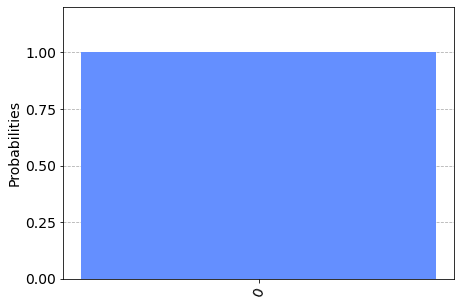

In [18]:
# Execute the circuit
ex = execute(ckt, Q_simulator, shots = 1024)
res = ex.result()
bars = res.get_counts(ckt)

# visualization
# we are interested in c1 only
filtered_list = [[k[1], v] for k, v in bars.items()]
newbars={}

for k, v in filtered_list:
    newbars[k] = newbars.get(k, 0) + v

        
# Plot the results
plot_histogram(newbars, bar_labels=False)

# Circuit with intermediate measurement

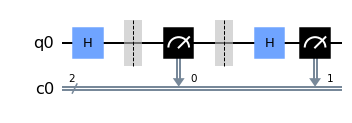

In [19]:
ckt = QuantumCircuit(q,c)

ckt.h(q[0])
ckt.barrier()

ckt.measure(q[0], c[0])

ckt.barrier()
ckt.h(q[0])
    
ckt.measure(q[0], c[1])
    
ckt.draw(output = "mpl")

# Circuit Simulation (only c1 is important to us)

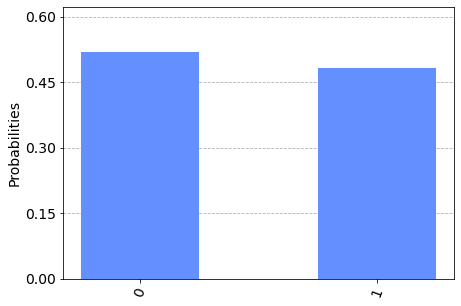

In [20]:
# Execute the circuit
ex = execute(ckt, Q_simulator, shots = 1024)
res = ex.result()
bars = res.get_counts(ckt)

# visualization
# we are interested in c1 only
filtered_list = [[k[1], v] for k, v in bars.items()]
newbars={}

for k, v in filtered_list:
    newbars[k] = newbars.get(k, 0) + v

        
# Plot the results
plot_histogram(newbars, bar_labels=False)

# BAM! Cool huh! ( if you don't think so read the explanation below)

# Hadmard gates are reversible and if applied twice on  a state, returns the same initial state

## When there is no measurement between the hadmard gates, the above law holds good. The qbit was initialized with 0 and we get back 0 all the times as measurement

## However when there is a measurent of the qubit after the first hadmard, the bit is no more in a superposition but it is a collapsed state: (0 or 1). So a second hadmard gate on this gives a superposed state only, so output is 50% times 1 and 50% times 0